# Script Performs Exploratory Data Analysis of US Flight Delay Data

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# Creating shortcut to folder
path = r'C:\Users\seank\OneDrive\Dokumente\Career Foundry Data Analytics Course\Data Immersion\6'


In [3]:
# Loading Data
data_all = pd.read_pickle(os.path.join(path, 'Data', 'flights_checked.csv'))

In [4]:
data_all.head()

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,Day_of_week,Year,Hour_planned_dep,time_bin,delay15,delay30,delay60,delay_type,Origin_State_Code,Destination_State_Code
0,2019-01-09,United,United Air Lines Inc.: UA,UA,19977,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",...,Wednesday,2019,11,09:00–13:00,0.0,0.0,0.0,On-time(<15m),FL,NJ
1,2022-11-19,Delta,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",...,Saturday,2022,21,21:00–01:00,0.0,0.0,0.0,On-time(<15m),MN,WA
2,2022-07-22,United,United Air Lines Inc.: UA,UA,19977,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",...,Friday,2022,9,09:00–13:00,0.0,0.0,0.0,On-time(<15m),CO,MN
3,2023-03-06,Delta,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",...,Monday,2023,16,13:00–17:00,1.0,0.0,0.0,Short_delay(<1h),MN,CA
4,2020-02-23,Spirit,Spirit Air Lines: NK,NK,20416,407,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",...,Sunday,2020,18,17:00–21:00,0.0,0.0,0.0,On-time(<15m),FL,TX


In [5]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2999998 entries, 0 to 2999999
Data columns (total 44 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   FL_DATE                  datetime64[ns]
 1   AIRLINE                  object        
 2   AIRLINE_DOT              object        
 3   AIRLINE_CODE             object        
 4   DOT_CODE                 int64         
 5   FL_NUMBER                int64         
 6   ORIGIN                   object        
 7   ORIGIN_CITY              object        
 8   DEST                     object        
 9   DEST_CITY                object        
 10  CRS_DEP_TIME             int64         
 11  DEP_TIME                 float64       
 12  DEP_DELAY                float64       
 13  TAXI_OUT                 float64       
 14  WHEELS_OFF               float64       
 15  WHEELS_ON                float64       
 16  TAXI_IN                  float64       
 17  CRS_ARR_TIME             int64  

In [6]:
data_all.shape

(2999998, 44)

# Exploratory Data Analyses

In [9]:
# Selecting only relevant vars for analysis
df = data_all[['FL_DATE', 'AIRLINE', 'ORIGIN_CITY', 'DEST_CITY', 'DEP_DELAY', 'TAXI_OUT', 'TAXI_IN', 'ARR_DELAY', 
               'CANCELLED', 'CANCELLATION_CODE', 'DISTANCE', 'DELAY_DUE_CARRIER','DELAY_DUE_WEATHER', 
               'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT',
               'Month', 'Day_of_week', 'Year', 'Hour_planned_dep', 'time_bin', 'delay15', 'delay30', 'delay60', 'top5_airline']].copy()

In [10]:
# Correlation matrix object
corr = df.corr(numeric_only=True)

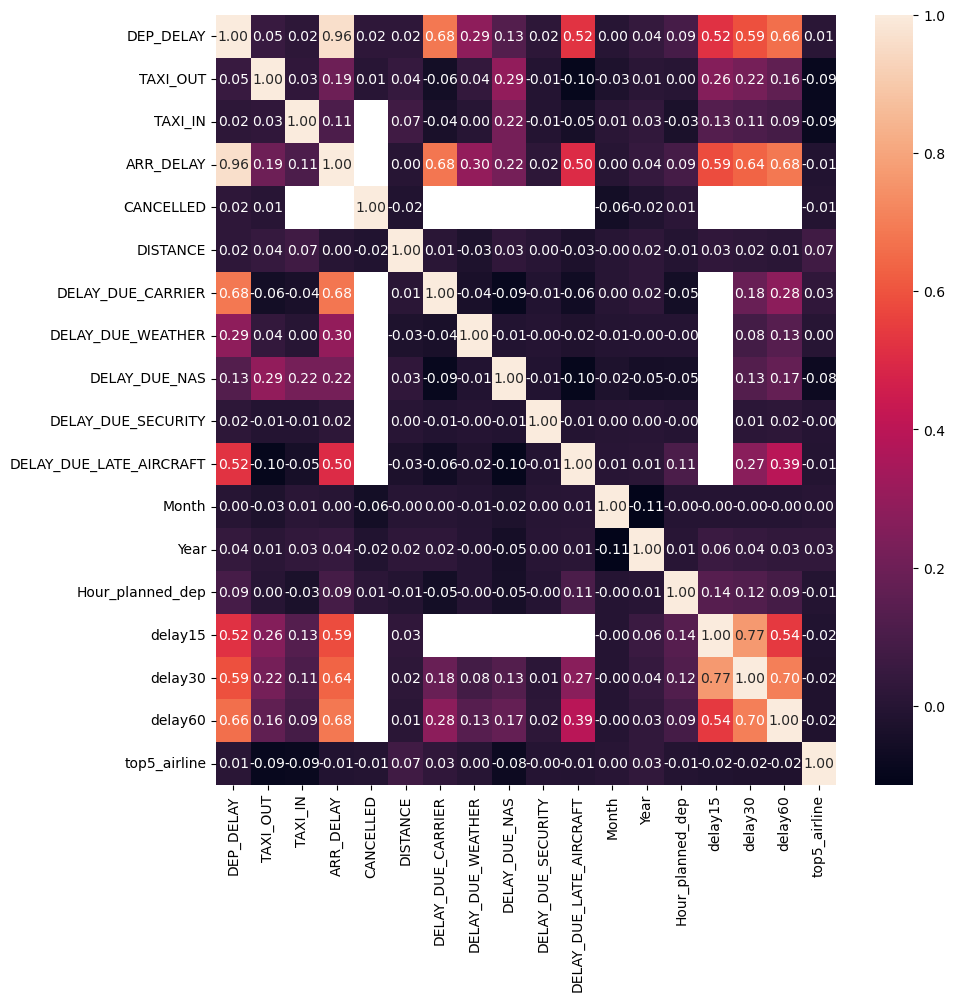

In [11]:
# Seaborn heatmap of correlations
f,ax = plt.subplots(figsize=(10,10))    

# apply sns heatmap onto correlation matrix 
heat_corr = sns.heatmap(corr, annot = True, fmt=".2f", ax = ax) 

The only strong correlation are between the delay reason variables (e.g., carrier, late aircraft etc) and the general delay vars (arrival or departure). THis isn't very interesting since the delay reason variables are just the individual components of the general vars. Other than that, the correlations are all very small and further investigation is needed to tease out interesting trends. Also, the most interesting variables are not included in this (e.g., airline carrier, 4 hour time bins)

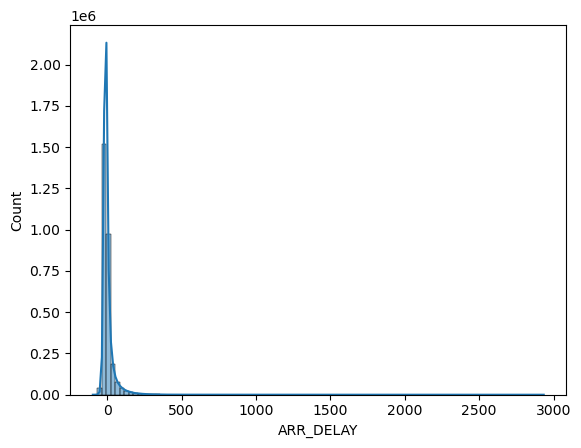

In [12]:
# Inspecting Distribution of Arrival Delays
del_hist = sns.histplot(df['ARR_DELAY'], bins=100, kde=True)

<Axes: xlabel='DEP_DELAY', ylabel='ARR_DELAY'>

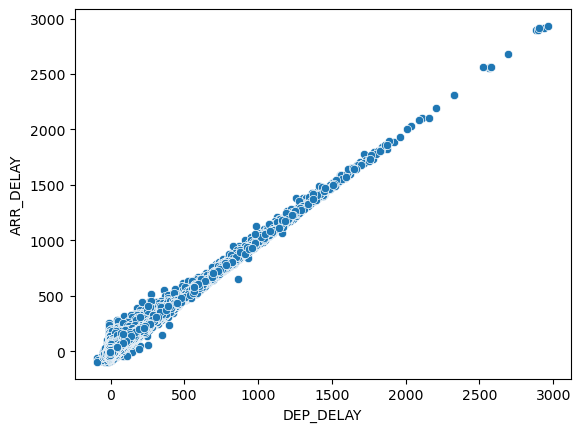

In [13]:
# Scatterplot with relationship between arrival and departure delay
sns.scatterplot(data=df,
                x = 'DEP_DELAY',
                y = 'ARR_DELAY')

<Axes: xlabel='DISTANCE', ylabel='ARR_DELAY'>

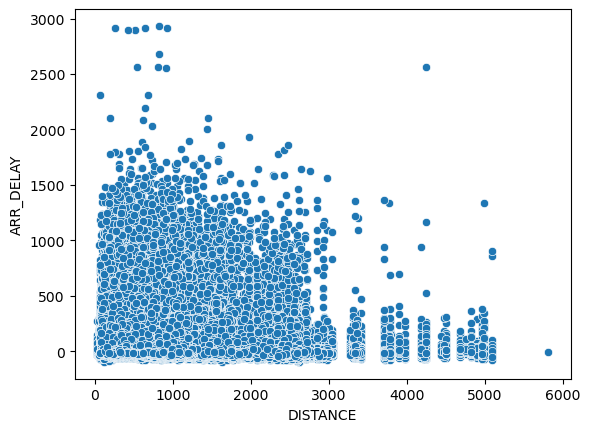

In [14]:
# Scatter of distance with delays
sns.scatterplot(data=df,
                x = 'DISTANCE',
                y = 'ARR_DELAY')

KeyboardInterrupt: 

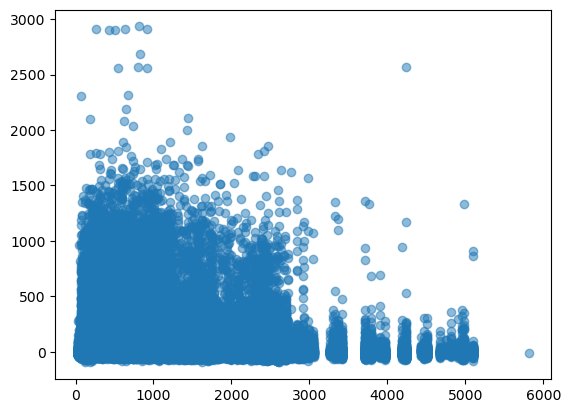

In [15]:
# Plotting with regression line to see potential relationship better
sns.regplot(data=df, 
            x='DISTANCE', 
            y='ARR_DELAY', 
            scatter_kws={'alpha': 0.5},
            line_kws={'color': 'red'})  # make regression line diff colour



In [23]:
# checking start and end data of data
df['FL_DATE'].min()

Timestamp('2019-01-01 00:00:00')

In [ ]:
df['FL_DATE'].max() # sept-dec are underrepresented so need to group by year also

Timestamp('2023-08-31 00:00:00')

In [ ]:
# Plotting Monthly flights
monthly_flights_count = df.groupby(['Month', 'Year']).size().reset_index(name='num_monthly_flights')
monthly_flights_count.head()

,Month,Year,num_monthly_flights
0,1,2019,59412
1,1,2020,62160
2,1,2021,36914
3,1,2022,54895
4,1,2023,55321
5,2,2019,54565
6,2,2020,58479
7,2,2021,33742
8,2,2022,50685
9,2,2023,51026


In [27]:
# Filtering to only 2019 and 2022, since 2020 and 2021 data so affected by lockdowns
monthly_flights_count_1922 = monthly_flights_count[monthly_flights_count['Year'].isin([2019, 2022])]

In [28]:
monthly_flights_avg = monthly_flights_count_1922.groupby('Month')['num_monthly_flights'].mean().reset_index()
monthly_flights_avg

,Month,num_monthly_flights
0,1,57153.5
1,2,52625.0
2,3,61321.0
3,4,59409.5
4,5,62008.5
5,6,61964.0
6,7,63978.5
7,8,63819.0
8,9,59504.5
9,10,61729.5


In [34]:
# Making monthly dictionary for plots using month
import calendar
month_abb = {i: calendar.month_abbr[i] for i in range(1, 13)}

In [ ]:
# Adding abbreviations to df for plotting
monthly_flights_avg['Month_abb'] = monthly_flights_avg['Month'].map(month_abb)
monthly_flights_avg     # checking it applied


,Month,num_monthly_flights,Month_abb
0,1,57153.5,Jan
1,2,52625.0,Feb
2,3,61321.0,Mar
3,4,59409.5,Apr
4,5,62008.5,May
5,6,61964.0,Jun
6,7,63978.5,Jul
7,8,63819.0,Aug
8,9,59504.5,Sep
9,10,61729.5,Oct


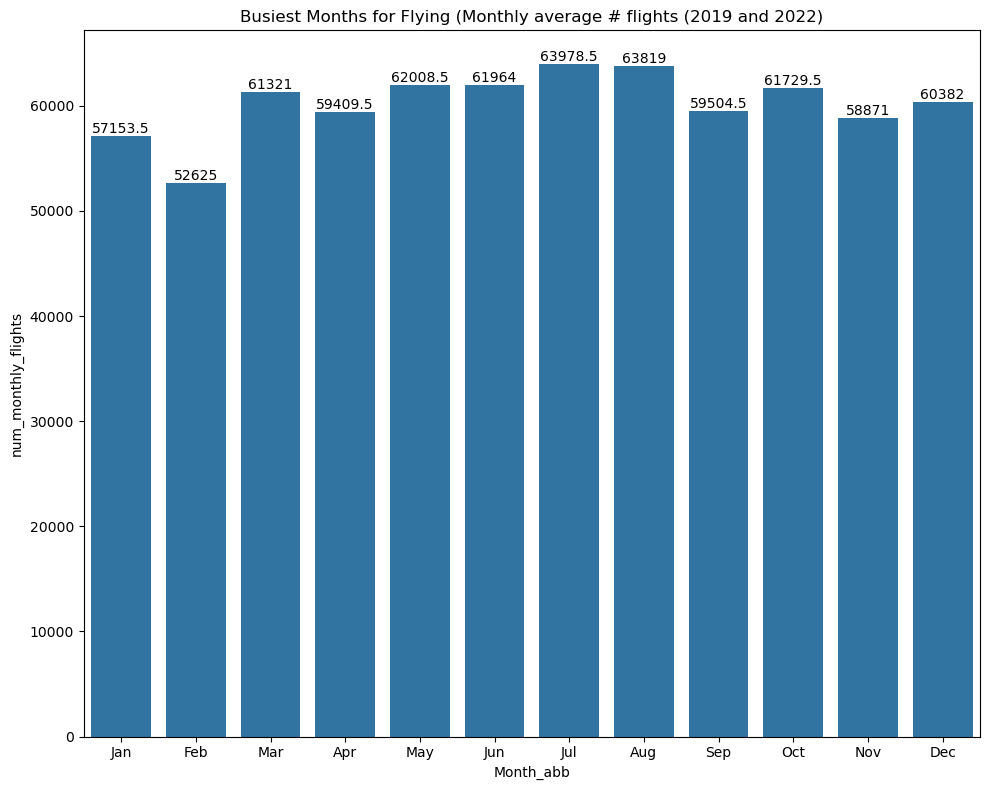

In [39]:
# Plotting
fig, ax = plt.subplots(figsize=(10,8))

sns.barplot(data=monthly_flights_avg,
            x = 'Month_abb',
            y = 'num_monthly_flights',
            ax=ax)

for i in ax.containers:
    ax.bar_label(i,)

ax.set_title('Busiest Months for Flying (Monthly average # flights (2019 and 2022)')
plt.tight_layout()
plt.show()

In [16]:
# Plotting delays by delay reason and month
# Aggregating to get total delay minutes by month
monthly_delay = df.groupby('Month')[['DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT']].sum()

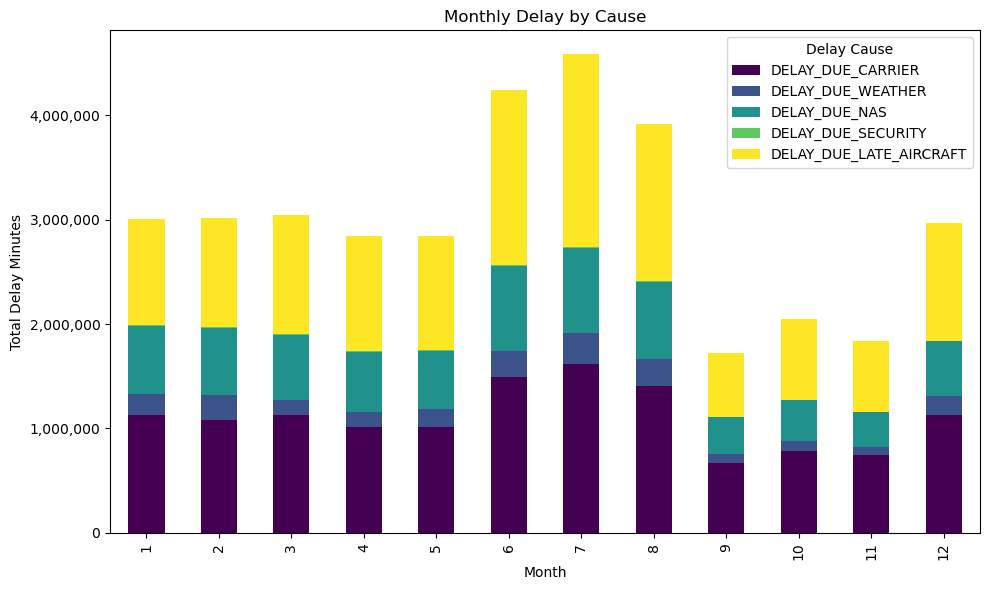

In [ ]:
# Stacked bar chart
import matplotlib.ticker as mticker

fig, ax = plt.subplots(figsize=(10, 6))

monthly_delay.plot(kind='bar', 
                   stacked=True, 
                   ax=ax, 
                   colormap='viridis')

ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax.set_title('Monthly Delay by Cause')
ax.set_xlabel('Month')
ax.set_ylabel('Total Delay Minutes')
ax.legend(title='Delay Cause')
plt.tight_layout()
plt.show()

Generally the proportions of delay causes consistent across months

In [18]:
# Probability of delay by month
monthly_delay_prob = df.groupby('Month')['delay15'].mean().reset_index()
monthly_delay_prob

,Month,delay15
0,1,0.170504
1,2,0.184906
2,3,0.170103
3,4,0.178940
4,5,0.173603
5,6,0.232657
6,7,0.224287
7,8,0.198996
8,9,0.133401
9,10,0.154689


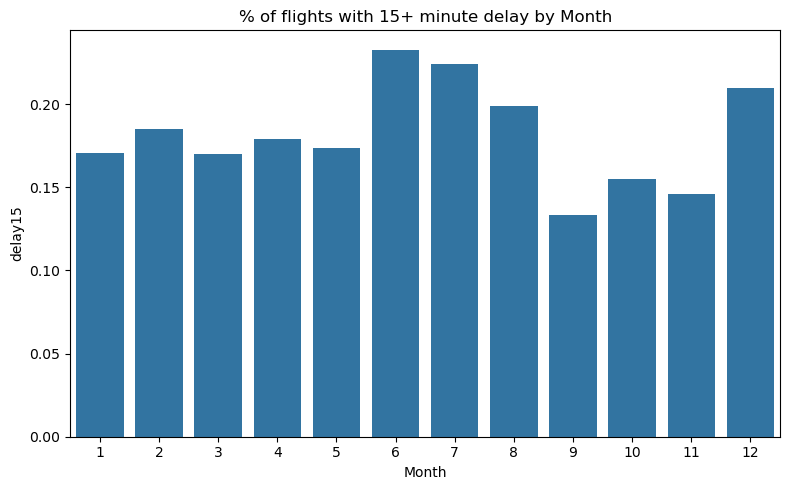

In [20]:
plt.figure(figsize=(8,5))

sns.barplot(data = monthly_delay_prob,
            x='Month',
            y='delay15')

plt.title('% of flights with 15+ minute delay by Month')
plt.tight_layout()
plt.show()

June, July, December and August most likely to have delays

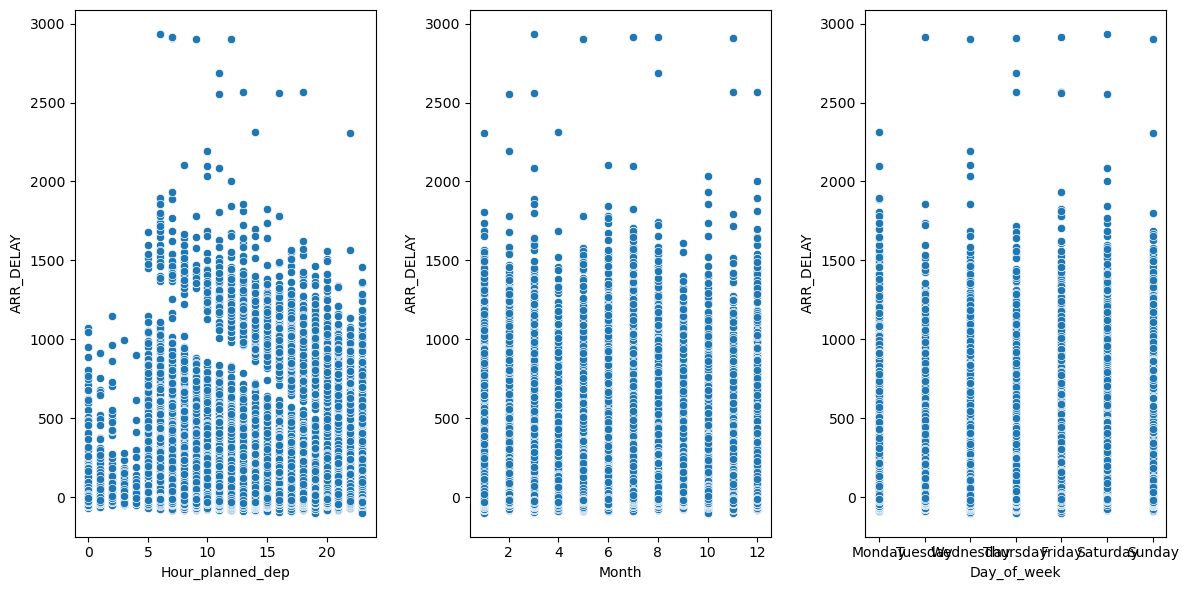

In [35]:
# Scatterplot of hour, month and day of week and arrival delays
fig, axes = plt.subplots(1, 3, figsize=(12, 6))     # 1x3 plot
# seaborn scatterplots
sns.scatterplot(data=df, x="Hour_planned_dep", y="ARR_DELAY", ax=axes[0])
sns.scatterplot(data=df, x="Month", y="ARR_DELAY", ax=axes[1])
sns.scatterplot(data=df, x="Day_of_week", y="ARR_DELAY", ax=axes[2])

plt.tight_layout()
plt.show()

not very informative so doing it with boxplots to see dispersion

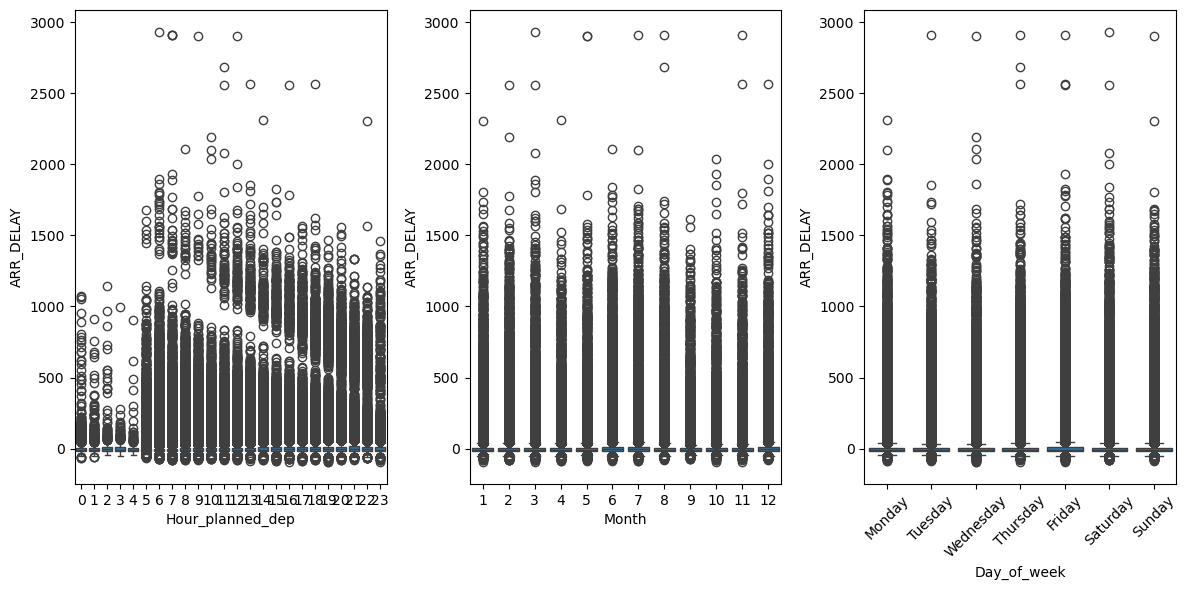

In [38]:
# Boxplots of hour, month and day of week and arrival delays
fig, axes = plt.subplots(1, 3, figsize=(12, 6))     # 1x3 plot
# seaborn scatterplots
sns.boxplot(data=df, x="Hour_planned_dep", y="ARR_DELAY", ax=axes[0])
sns.boxplot(data=df, x="Month", y="ARR_DELAY", ax=axes[1])
sns.boxplot(data=df, x="Day_of_week", y="ARR_DELAY", ax=axes[2])
# rotate x axis labels for day of week
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Very tightly packed median and quartiles around 0

In [55]:
# look at average probability of a delay by time period
delay_by_time = df.groupby('time_bin')['delay30'].mean().reset_index()  # creating grouped df
delay_by_time.columns = ['time_bin', 'Delay_Rate (≥30 mins)']   # renaming cols

print(delay_by_time)

      time_bin  Delay_Rate (≥30 mins)
0  05:00–09:00               0.088825
1  09:00–13:00               0.115872
2  13:00–17:00               0.159440
3  17:00–21:00               0.193580
4  21:00–01:00               0.191454
5  01:00–05:00               0.137950


C:\Users\seank\AppData\Local\Temp\ipykernel_19684\3426347604.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  delay_by_time = df.groupby('time_bin')['delay30'].mean().reset_index()  # creating grouped df


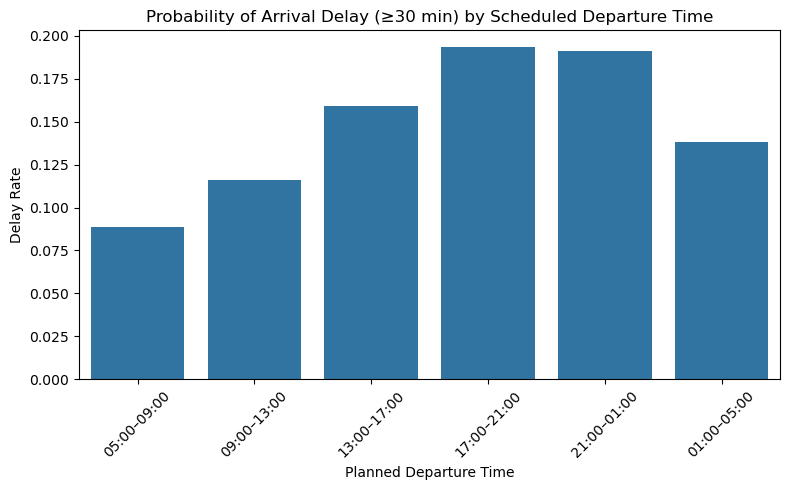

In [56]:
# Bar plot of delay rate by time period
plt.figure(figsize=(8, 5))
sns.barplot(data=delay_by_time, x='time_bin', y='Delay_Rate (≥30 mins)')

plt.title('Probability of Arrival Delay (≥30 min) by Scheduled Departure Time')
plt.ylabel('Delay Rate')
plt.xlabel('Planned Departure Time')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [52]:
delay_by_day = df.groupby('Day_of_week')['delay30'].mean().reset_index()  # creating grouped df
delay_by_day.columns = ['Day_of_week', 'Delay_Rate (≥30 mins)']   # renaming cols

print(delay_by_day)

  Day_of_week  Delay_Rate (≥30 mins)
0      Monday               0.145072
1     Tuesday               0.124145
2   Wednesday               0.132598
3    Thursday               0.150925
4      Friday               0.152483
5    Saturday               0.136996
6      Sunday               0.149297


C:\Users\seank\AppData\Local\Temp\ipykernel_19108\3760014558.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  delay_by_day = df.groupby('Day_of_week')['delay30'].mean().reset_index()  # creating grouped df


In [53]:
delay_by_month = df.groupby('Month')['delay30'].mean().reset_index()  # creating grouped df
delay_by_month.columns = ['Month', 'Delay_Rate (≥30 mins)']   # renaming cols

print(delay_by_month)

    Month  Delay_Rate (≥30 mins)
0       1               0.134219
1       2               0.143724
2       3               0.151502
3       4               0.177357
4       5               0.127284
5       6               0.175510
6       7               0.168914
7       8               0.150231
8       9               0.094835
9      10               0.104659
10     11               0.092756
11     12               0.155756


Delays by airline and airport

In [ ]:
# Create pivot table with percentage of delayed flights by city and airline
airline_airport_delay = df.pivot_table(
    index='AIRLINE',               
    columns='ORIGIN_CITY',         
    values='delay30',              # Cell values: avg of delay30
    aggfunc='mean'                 # Compute delay rate 
)
airline_airport_delay.head()

ORIGIN_CITY,"Aberdeen, SD","Abilene, TX","Adak Island, AK","Aguadilla, PR","Akron, OH","Alamosa, CO","Albany, GA","Albany, NY","Albuquerque, NM","Alexandria, LA",...,"Wichita, KS","Williamsport, PA","Williston, ND","Wilmington, DE","Wilmington, NC","Worcester, MA","Wrangell, AK","Yakima, WA","Yakutat, AK","Yuma, AZ"
AIRLINE,,,,,,,,,,,,,,,,,,,,,
Alaska,NaN,NaN,0.317073,NaN,NaN,NaN,NaN,NaN,0.116379,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.10119,NaN,0.136223,NaN
Allegiant,NaN,NaN,NaN,NaN,0.302083,NaN,NaN,0.236515,0.192308,NaN,...,0.237288,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
American,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.156342,0.152155,NaN,...,0.198992,NaN,NaN,NaN,0.132530,NaN,NaN,NaN,NaN,NaN
Delta,NaN,NaN,NaN,NaN,0.048780,NaN,NaN,0.084536,0.067130,NaN,...,0.068241,NaN,NaN,NaN,0.049383,NaN,NaN,NaN,NaN,NaN
Endeavor,NaN,NaN,NaN,NaN,0.091837,NaN,0.059016,0.120301,NaN,0.084567,...,0.061798,NaN,NaN,NaN,0.106996,0.214286,NaN,NaN,NaN,NaN


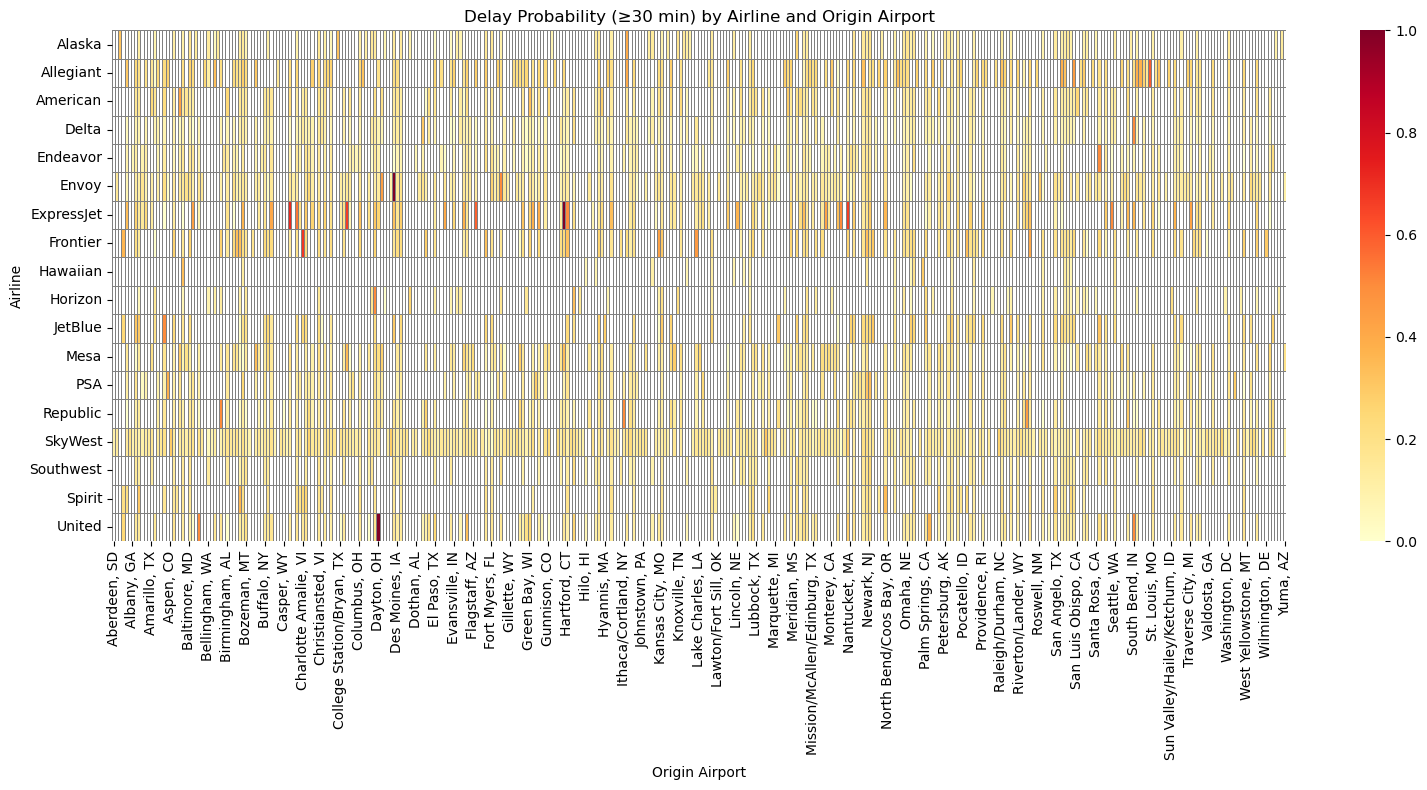

In [17]:
plt.figure(figsize=(16, 8))
sns.heatmap(data=airline_airport_delay, 
            cmap='YlOrRd', 
            linewidths=0.5, 
            linecolor='gray', 
            annot=False, 
            fmt='.2f')

plt.title('Delay Probability (≥30 min) by Airline and Origin Airport')
plt.xlabel('Origin Airport')
plt.ylabel('Airline')
plt.tight_layout()
plt.show()

too many airports so filtering

In [18]:
airport_counts = df['ORIGIN_CITY'].value_counts()
airport_counts

ORIGIN_CITY
Chicago, IL              157368
Atlanta, GA              153556
Dallas/Fort Worth, TX    130334
Denver, CO               119918
New York, NY             113039
                          ...  
Watertown, NY                21
Ogden, UT                    18
Wilmington, DE               17
Florence, SC                  8
Williamsport, PA              6
Name: count, Length: 373, dtype: int64

In [19]:
# check how many have at least 1000 flights
print((airport_counts >= 1000).sum())

193


In [ ]:
# Taking top 100 airports
top100_airports = airport_counts.head(100).index  

In [21]:
# Filtering data to only have top100 airports for heatmap
df_top100 = df[df['ORIGIN_CITY'].isin(top100_airports)]

In [22]:
# Creating pivot table for heatmap with values as probability/percentage of 30m+ delay per airline per airport (top100 airports)
airline_airport_delay_100 = df_top100.pivot_table(
    index='AIRLINE',
    columns='ORIGIN_CITY',
    values='delay30',
    aggfunc='mean'
)

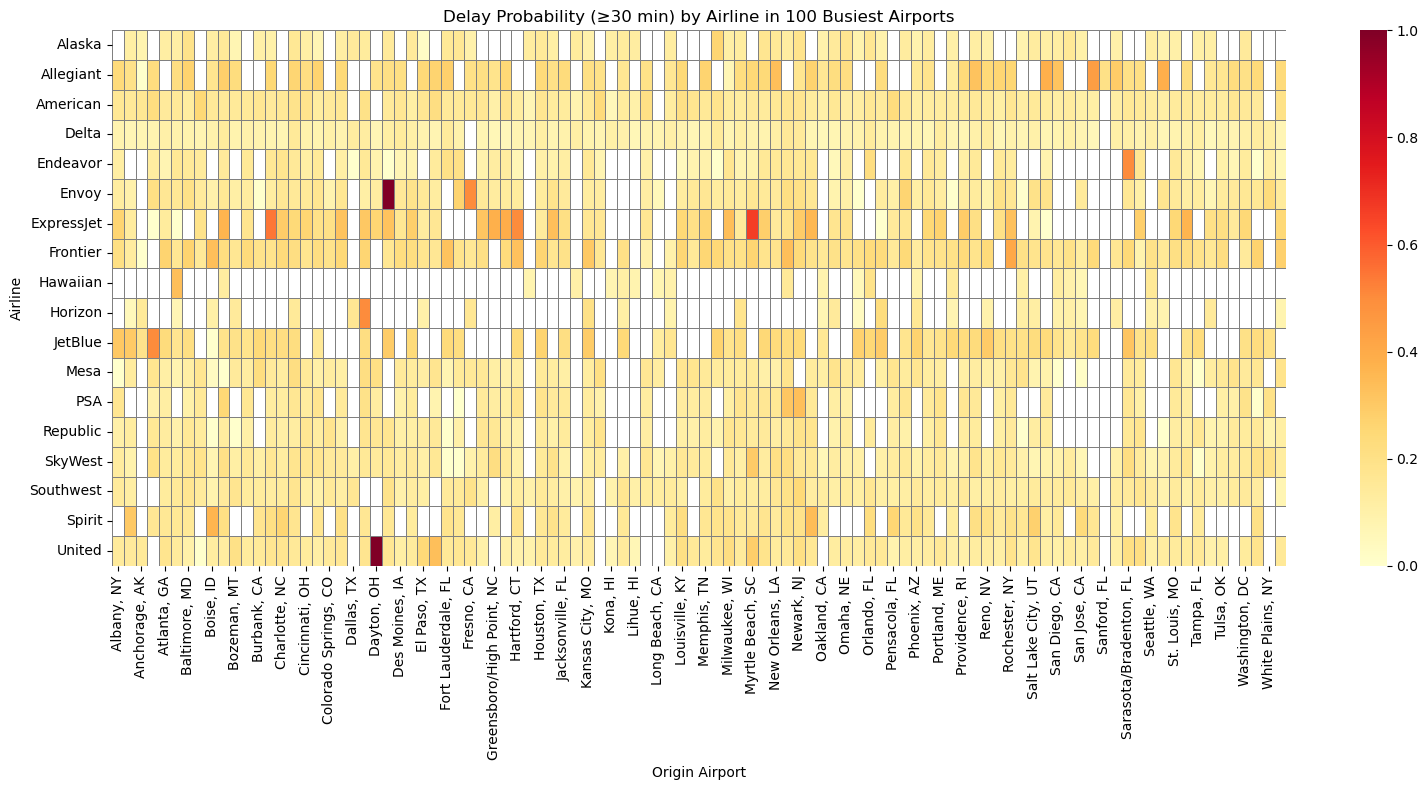

In [23]:
plt.figure(figsize=(16, 8))
sns.heatmap(airline_airport_delay_100, 
            cmap='YlOrRd', 
            linewidths=0.5, 
            linecolor='gray', 
            annot=False, 
            fmt='.2f')

plt.title('Delay Probability (≥30 min) by Airline in 100 Busiest Airports')
plt.xlabel('Origin Airport')
plt.ylabel('Airline')
plt.tight_layout()
plt.show()

Looking at Delay rate and count by airline

In [24]:
# Create data table for graph with probability and count of delays
airline_stats = df.groupby('AIRLINE').agg(
    delay_prob=('delay30', 'mean'),
    flight_count=('delay30', 'count')
).reset_index()

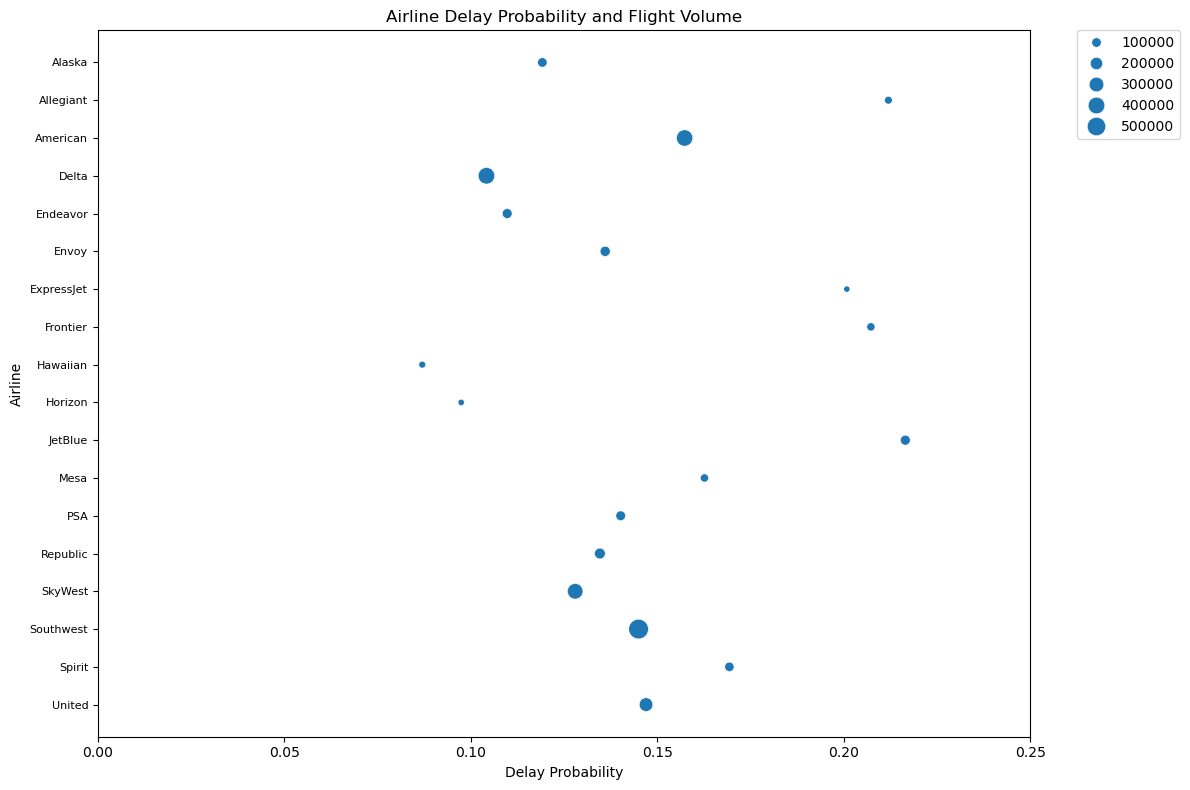

In [46]:
# Scatterplot with size of dots as number of delays
plt.figure(figsize=(12, 8))  
sns.scatterplot(data=airline_stats,
                x='delay_prob', y='AIRLINE',
                size='flight_count',
                sizes=(20, 200))

plt.title('Airline Delay Probability and Flight Volume')
plt.xlabel('Delay Probability')
plt.ylabel('Airline')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.tick_params(axis='y', labelsize=8)
plt.xlim(0,0.25)

plt.tight_layout()
plt.show()

In [48]:
airline_order_delay = (
    df.groupby('AIRLINE')['delay30']
    .mean()
    .sort_values(ascending=False)
    .index.tolist()
)

Investigation of Cancellation Rates

In [27]:
# df with airline cancellation rates 
airline_cancel = (
    df.groupby('AIRLINE')['CANCELLED']
    .mean()
    .reset_index()
    .sort_values('CANCELLED', ascending=False)
)
airline_cancel.columns = [['Airline', 'Cancellation Rate (%)']]
print(airline_cancel)

       Airline Cancellation Rate (%)
6   ExpressJet              0.055655
1    Allegiant              0.045186
11        Mesa              0.036501
15   Southwest              0.033766
13    Republic              0.032465
12         PSA              0.030836
5        Envoy              0.029961
2     American              0.028470
10     JetBlue              0.026931
7     Frontier              0.025843
16      Spirit              0.024156
14     SkyWest              0.022532
17      United              0.021752
4     Endeavor              0.021287
0       Alaska              0.019250
9      Horizon              0.018125
3        Delta              0.015135
8     Hawaiian              0.012082


In [33]:
# also using this as axis order for next graph
airline_order = (
    df.groupby('AIRLINE')['CANCELLED']
    .mean()
    .sort_values(ascending=False)
    .index.tolist()
)

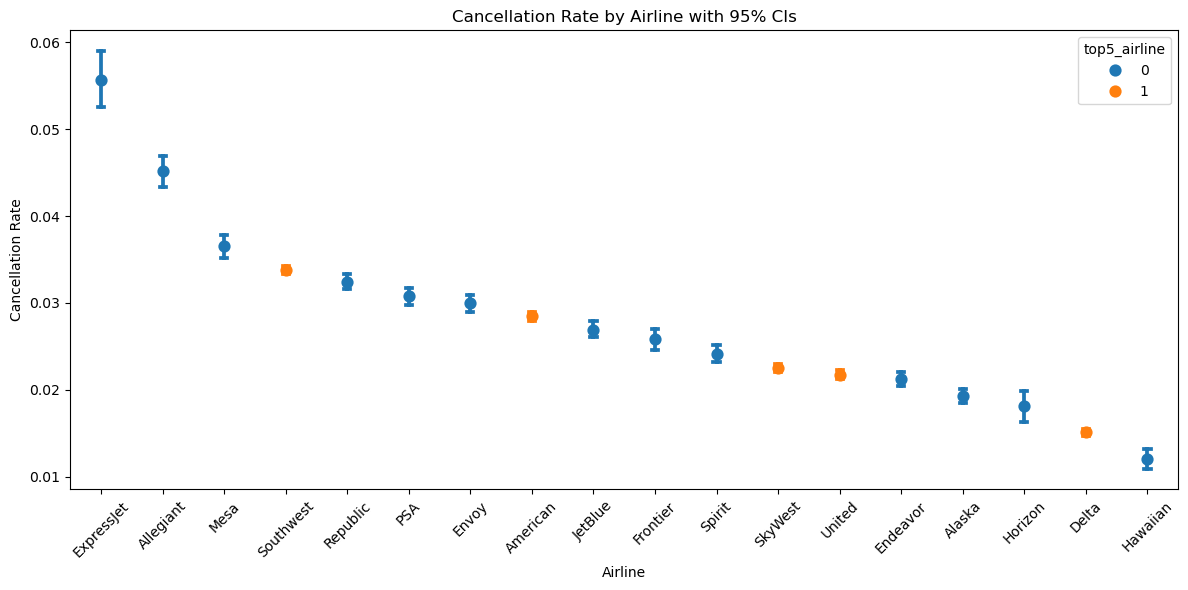

In [41]:
# Plotting and including 95% CIs to get a feel for significance of differences
plt.figure(figsize=(12,6))

sns.pointplot(
    data=df,
    x='AIRLINE',
    y='CANCELLED',
    estimator='mean',
    errorbar=('ci', 95), 
    order=airline_order,
    hue='top5_airline',           
    linestyle='none',          
    capsize=0.1
)

plt.xlabel('Airline')
plt.ylabel('Cancellation Rate')
plt.xticks(rotation=45)
plt.title('Cancellation Rate by Airline with 95% CIs')

plt.tight_layout()
plt.show()

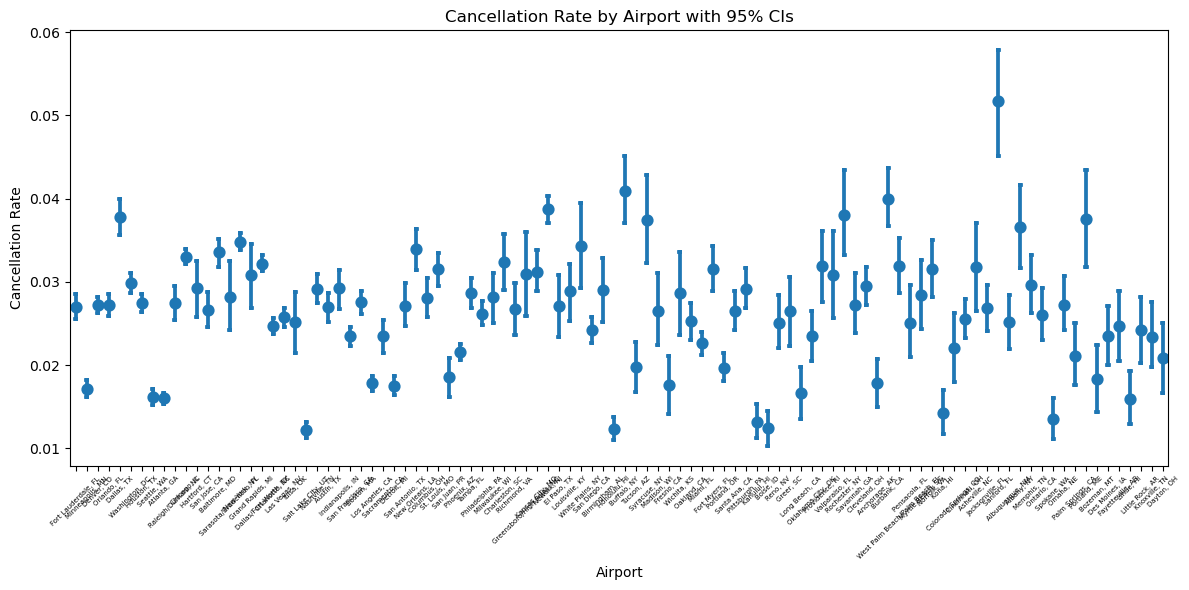

In [ ]:
# Pointplot with just the top100 airports and their cancellation rates
plt.figure(figsize=(12,6))

sns.pointplot(
    data=df_top100,
    x='ORIGIN_CITY',
    y='CANCELLED',
    estimator='mean',
    errorbar=('ci', 95),        
    linestyle='none',          
    capsize=0.1
)

plt.xlabel('Airport')
plt.ylabel('Cancellation Rate')
plt.xticks(rotation=45, fontsize = 5)
plt.title('Cancellation Rate by Airport with 95% CIs')

plt.tight_layout()
plt.show()

Covid

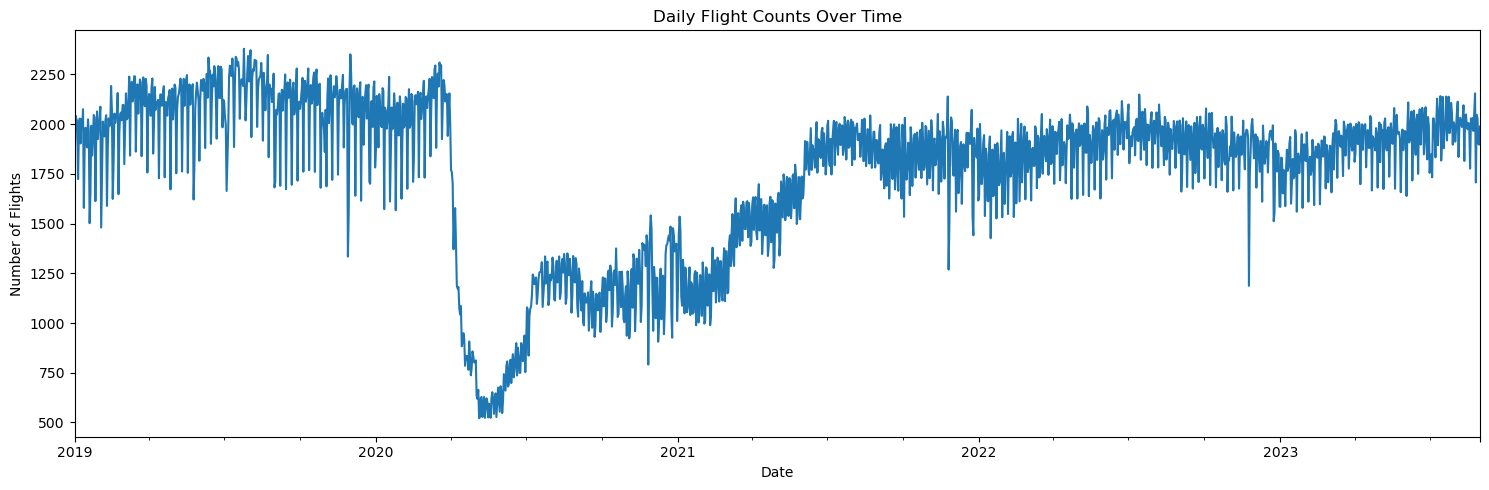

In [ ]:
# Looking at flight frequency pre, during and post covid
daily_counts = df.groupby('FL_DATE').size()

# Plot
plt.figure(figsize=(15, 5))
daily_counts.plot()
plt.title('Daily Flight Counts Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Flights')
plt.tight_layout()
plt.show()

After a dramatic dip in Spring 2020, marking the onset of the pandemic and lockdown measures, in about mid 2021 the number of daily flights has risen and remained at almost pre-Covid levels